# The Math of Intelligence Step #3

## by PARK-SI HYUNG. 2019-01-15.
---
# # DIMENSIONALITY REDUCTION


>PCA(PRINCIPAL COMPONENT ANALYSIS)의 목적
- 데이터에서 패턴을 찾는것 
- 변수들 사이에 강한 상관관계만 존재한다면 차원을 축소하는게 순조로워집니다
- 우리가 필요한 것은 상관관계를 가진 변수들을 찾아 1차원으로 만드는 것입니다

![JPEG](http://www.nlpca.org/fig-pca-principal-component-analysis-m.png)

### HIGH DIMENSIONAL DATA는 처리하기가 까다롭습니다
- 차원의 저주 ! 고차원의 데이터는 시간도 오래걸리고 데이터의 양이 기하급수적으로 증가합니다
- 오버피팅의 문제
- 모든 변수들이 필요하진 않다, 우리가 필요한 변수만 골라내자
- 차원을 줄이면 노이즈도 줄일 수 있다

### FEATURE SELECTION
- 우리에게 필요한 FEATURE들을 선택하는게 가장 중요합니다
- 예를들어 타이타닉의 생존자를 예측하는데 수많은 FEATURE이 있겠지만
- 성별, 나이, 1등석 등 변수들이 짐 무게, 탑승 항구 같은 변수보다 중요할 수 있습니다

### FEATURE EXTRACTION
- FEATURE를 선택하는것도 중요하지만 새로운 FEATURE를 만들어 내는것 또한 중요합니다
- 이름의 Mr, Mrs, MASTER 등을 가지고 새로운 이니셜 FEATURE를 만들어 낼 수도 있고
- 나이를 10~20, 20~30를 기준으로 AGE_CATEGORY를 만들 수도 있습니다
---
# VARIANCE MAXIMIZE (분산 최대화)
> PCA는 분산을 최대화 하는 과정입니다 (분산 : 데이터가 서로 얼마나 떨어져있는지)

- 분산을 최대화 함으로써 각 벡터들이 독립적인 역할을 수행하도록 해줍니다
    

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

# 데이터셋을 불러옵니다
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

# 5개의 column만 골라옵니다
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
# 결측치는 모두 없애줍니다
df.dropna(how="all", inplace=True) # drops the empty line at file-end

# X에는 SEPAL_LEN, SEPAL_WID, PETAL_LEN, PETAL_WIN 칼럼을 넣어주고
# Y에는 CLASS 칼럼을 넣어줍니다 (LABEL)
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

# df에는 각 50개의 Iris-setosa, Iris-versicolor, Iris-virginica가 분포합니다
# 히스토그램을 그려 이들의 sepal length, width, petal length, width를 알아봅시다
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    # 그래프 사이즈를 8X6으로 지정
    plt.figure(figsize=(8, 6))
    # 총 4개의 그래프를 순서대로 출력
    for cnt in range(4):
        # 가로 2개, 세로 2개의 그래프를 그립니다
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

<Figure size 800x600 with 4 Axes>

# COVARIANCE MATRIX

> PCA를 하기 위해 공분산을 구해봅시다. <BR>공분산이란 데이터가 얼마나 떨어져있는지 나타냅니다

### 공분산 공식
![JPEG](https://render.githubusercontent.com/render/math?math=%5CSigma%20%3D%20%5Cfrac%7B1%7D%7Bn-1%7D%20%5Cleft%28%20%28%5Cmathbf%7BX%7D%20-%20%5Cmathbf%7B%5Cbar%7Bx%7D%7D%29%5ET%5C%3B%28%5Cmathbf%7BX%7D%20-%20%5Cmathbf%7B%5Cbar%7Bx%7D%7D%29%20%5Cright%29&mode=inline)
---
### 하지만 공분산에도 문제가 하나있습니다. 단위의 크기에 영향을 받습니다
- 이점을 보완하기 위해 상관계수로 나타내 봅시다

In [2]:
# 위에서 구한 X데이터를 가지고 PCA를 해봅시다
# X데이터에는 150개 꽃의 'sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'
# 4종류의 데이터가 분포하고 있습니다 (150X4, 600개의 데이터)
# PCA를 위해 표본공분산을 구해봅시다. 표본공분산이란 데이터가 얼마나 떨어져있는지 나타냅니다

from sklearn.preprocessing import StandardScaler
import numpy as np
# 평균이 0이고 표준쳔차가 1인 변수들로 바꿔줍니다
X_std = StandardScaler().fit_transform(X)
# 평균을 구합니다
mean_vec = np.mean(X_std, axis=0)

# 위의 공식을 대입해 공분산을 구해봅니다
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix')
print(cov_mat)

Covariance matrix
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


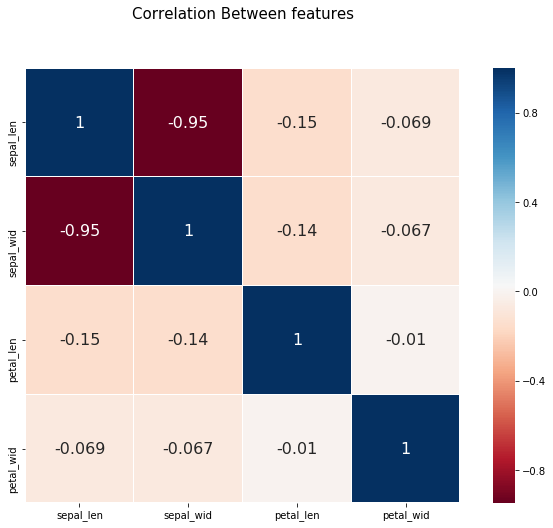

In [3]:
# 공분산보다는 상관관계가 더 직관적입니다
# 히트맵을 그려서 4개 변수의 상관관계를 알아봅시다
cov, s, v = np.linalg.svd(X_std.T)

# 공분산을 DatFrame에 넣어줍시다
df = pd.DataFrame(cov, columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'],
                  index= ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])

import seaborn as sns

heatmap_data = df
colormap = plt.cm.RdBu
plt.figure(figsize=(12,8))
plt.title('Correlation Between features', size=15, y=1.1)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})


#   
#   
#   

# # RECURRENT NEURAL NETWORK

> 과거의 데이터가 미래에 영향을 줄 수 있는 신경망
---

# WHAT IS RNN ?
![JPEG](https://cdn-images-1.medium.com/max/1600/1*hbpW6FRw7mrc607fwM9rKw.gif)


- 우리가 앞에서 봤던 NEURAL NETWORK는 항상 같은 결과를 반환합니다
- 메모리가 없기 때문에 입력할 때 마다 초기화 되기 때문입니다
- 이번에는 NETWORK 안에 상태(STATE)를 추가해 과거의 데이터가 
- 미래에 영향을 줄 수 있는 신경망을 만들어 봅니다
- 예를들어 I am hungr에서 다음 글자로 y가 오는 것을 예측할 수 있습니다

![JPEG](https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png)

## 위 그림처럼 하나의 네트워크가 여러개 복사된 형태를 띕니다
## 각각의 네트워크는 다음 단계로 정보를 넘겨줍니다
---
## 어디에 유용할까 ?
- Time Series Prediction(시계열 데이터) : 날씨, 주가, 교통량 예측
- Sequential Data Generation(순차 데이터) : 음악, 영상, 음성생성 및 자동완성



---
# RNN LOSS FUNCTION

### LOSS FUNCTION으로는 PROBABILITY(확률)을 사용합니다
![JPEG](https://camo.githubusercontent.com/415f2e709cbf1316fb8b10c30bdef44eb9ff42a8/687474703a2f2f692e696d6775722e636f6d2f4c6c494d76656b2e706e67)
- 다음에 예상되는 문자와 TARGET 문자를 비교해 오차를 계산합니다 

In [4]:
# 카프카의 소설을 이용해 훈련시켜봅시다
data = open('kafka.txt', 'r').read()

chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('data has {}, {} unique'.format(data_size, vocab_size))

# encode와 decode할 딕셔너리를 2개 만듭니다
# encode는 데이터를 부호화 하는것이고(숫자로), decode는 그것을 해제하는 것 입니다
# char 데이터를 index로 변환
char_to_ix = {ch : i for i, ch in enumerate(chars)}
# index를 char 데이터로 변환
ix_to_char = {i : ch for i, ch in enumerate(chars)}

# a가 들어있는 숫자를 벡터화 해줍니다. a가 딱 하나 존재합니다
vector_for_char_a = np.zeros((vocab_size, 1))
vector_for_char_a[char_to_ix['a']] = 1

# hyperparameters
hidden_size = 100
# 알파벳은 26개가 존재
seq_length = 25
learning_rate = 1e-1

data has 137628, 80 unique


In [5]:
# forward, backward 모델을 만들어봅시다
# model parameters
# input->hidden, hidden->hidden, hidden->output의 weight들을 설정해줍니다
# bias->hidden, bias->output의 bias 또한 임의로 설정해줍니다

# input -> hidden state로 향하는 weight
Wxh = np.random.randn(hidden_size, vocab_size) * 0.01
# hiden -> next hidden state로 향하는 weight
Whh = np.random.randn(hidden_size, hidden_size) * 0.01
# hidden -> output으로 향하는 weight
Why = np.random.randn(vocab_size, hidden_size) * 0.01
# bias -> hidden state의 bias
bh = np.zeros((hidden_size, 1))
# bias -> output으로 향하는 bias
by = np.zeros((vocab_size, 1))


# loss function을 정의해봅시다
def lossFun(inputs, targets, hprev):
    # xs : 1-hot encoding을 한 input character
    # hs : hidden state out for 25 time steps
    # ys ; target value
    # ps : take the ys and convert them to nomarlized probability
    xs, hs, ys, ps = {}, {}, {}, {}
    # hidden prev를 그대로 사용합니다
    hs[-1] = np.copy(hprev)
    
    # initialize loss = 0
    loss = 0
    
    # forward 과정
    for t in range(len(inputs)):
        
        # input state 초기화
        xs[t] = np.zeros((vocab_size,1))
        xs[t][inputs[t]] = 1
        # input -> hidden + hidden -> hidden forward
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state                                                                                                            
        # unnormalized log probabilities
        ys[t] = np.dot(Why, hs[t]) + by
        # 다음 글자를 고를 확률
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars                                                                                                              
        # softmax(cross-entropy loss)
        loss += -np.log(ps[t][targets[t],0])
    
    # backward(backpropagation)을 해봅니다
    # np.zeros_like는 입력받는 배열의 형태와 같은 크기의 0을 반환합니다
    # dWxh, dWhh, dWhy, dbh, dby, dhnext를 초기화
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
    
    for t in reversed(range(len(inputs))):
        # forward에서 얻은 확률을 토대로 가중치를 조절해줍니다
        # collect ouput probability
        dy = np.copy(ps[t])
        # 1st gradient value를 추출
        dy[targets[t]] -= 1
        # compute output gradient - output times hidden states transpose
        # Transpose를 적용하는 이유는 네트워크를 통해 오차를 뒤로 전파하는것으로
        # 생각할 수 있습니다. n번째 레이어의 출력에서 오류에 대한 측정을 제공합니다
        # error value constantly change every layer 
        dWhy += np.dot(dy, hs[t].T)
        # derivative of output bias
        dby += dy
        # backpropagate into hidden layer
        dh = np.dot(Why.T, dy) + dhnext
        # tanh nonlinearity를 이용한 backpropation
        dhraw = (1 - hs[t] * hs[t]) * dh
        # derivative of hidden bias
        dbh += dhraw
        # derivative of input to hidden layer
        dWxh += np.dot(dhraw, xs[t].T)
        # derivative of hiden layer to hidden layer
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)
        
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        # 엄청나게 큰 데이터(예를들어 성경)를 학습하다보면 학습을 계속함에 따라
        # 기울기가 사라질 수 있습니다 (음의 무한대로 가거나, 양의 무한대로 가거나)
        # 이를 방지하기 위해 numpy의 clip 함수를 써줍니다
        # -5보다 작으면 -5로 고정, 5보다 크면 5로 고정, 그 사이는 그대로 나타냅니다
        np.clip(dparam, -5, 5, out=dparam)
    
    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

# 모델이 완성되었습니다 !!

In [6]:
#이부분은 실행부분입니다. 그냥 복붙해서 실행해보겠습니다

#prediction, one full forward pass
def sample(h, seed_ix, n):
  """                                                                                                                                                                                         
  sample a sequence of integers from the model                                                                                                                                                
  h is memory state, seed_ix is seed letter for first time step   
  n is how many characters to predict
  """
  #create vector
  x = np.zeros((vocab_size, 1))
  #customize it for our seed char
  x[seed_ix] = 1
  #list to store generated chars
  ixes = []
  #for as many characters as we want to generate
  for t in range(n):
    #a hidden state at a given time step is a function 
    #of the input at the same time step modified by a weight matrix 
    #added to the hidden state of the previous time step 
    #multiplied by its own hidden state to hidden state matrix.
    h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
    #compute output (unnormalised)
    y = np.dot(Why, h) + by
    ## probabilities for next chars
    p = np.exp(y) / np.sum(np.exp(y))
    #pick one with the highest probability 
    ix = np.random.choice(range(vocab_size), p=p.ravel())
    #create a vector
    x = np.zeros((vocab_size, 1))
    #customize it for the predicted char
    x[ix] = 1
    #add it to the list
    ixes.append(ix)

  txt = ''.join(ix_to_char[ix] for ix in ixes)
  print('----\n %s \n----' % (txt, ))
hprev = np.zeros((hidden_size,1)) # reset RNN memory  
#predict the 200 next characters given 'a'
sample(hprev,char_to_ix['a'],200)

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad                                                                                                                
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0                                                                                                                        
while n<=1000*10:
  # prepare inputs (we're sweeping from left to right in steps seq_length long)
  # check "How to feed the loss function to see how this part works
  if p+seq_length+1 >= len(data) or n == 0:
    hprev = np.zeros((hidden_size,1)) # reset RNN memory                                                                                                                                      
    p = 0 # go from start of data                                                                                                                                                             
  inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
  targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

  # forward seq_length characters through the net and fetch gradient                                                                                                                          
  loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001

  # sample from the model now and then                                                                                                                                                        
  if n % 1000 == 0:
    print ('iter %d, loss: %f' % (n, smooth_loss)) # print progress
    sample(hprev, inputs[0], 200)

  # perform parameter update with Adagrad                                                                                                                                                     
  for param, dparam, mem in zip([Wxh, Whh, Why, bh, by],
                                [dWxh, dWhh, dWhy, dbh, dby],
                                [mWxh, mWhh, mWhy, mbh, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update                                                                                                                   

  p += seq_length # move data pointer                                                                                                                                                         
  n += 1 # iteration counter

----
 
)'"YTcNL' A$XwfSMQ$tf@K69,ALvKRt*?Jlow374oGY$vo6om9l9B nlub:%ybbW(xxSaX*xpnPxkDgcmq5QYV;$mFIm9,3WJsTdck$9x4r-.,XazXpzG3D-9e?%
1Yn%;.
2%'/t:y'bYlw5PxzMpquPHP9J@;qG5H!$"ç3TG;JClj1,Y!'4%*-Wf'rQDNE.QY%oC 
----
iter 0, loss: 109.550662
----
 PylDzxMzT? MMeyjy8SOLaeT00B.4v33.o,xo:jfPszE13-' ked%0Mc?A-YzO8K222B%PW"DpLE2,DsY2g;/:QEP7kV.wFcv7a?'RM kJwrK,iAç/'X/*5K)pj59yPKJ;Atli'(/JFmFXN:9--LGTwA/oWX0"@SIkByz?xpJ:ç6dms*dDOd qXhNg$wiT(j7;sGdRm5 
----
iter 1000, loss: 85.759024
----
  pmltl se cleem tht tod a's kes more tug goherliigherh ree ho Had tre  couerSind an, thnhell sa,ig aomeun dtr ler hileco ckkatf lac im alr don taventhetn -e sk ro asre  thenm tohe a' im,  he me ad he. 
----


KeyboardInterrupt: 

#   
#   
#   

# # PROBABILITY THEORY
---

# NAIVE BAYES 정리

![JPEG](http://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png)

# 사건 X가 발생한 경우 C의 확률을 나타냅니다
- 사전에 발생한 사건의 확률을 토대로 앞으로 일어날 일을 예측

### 선행조건 2가지
- 1. DATASET의 각 단어가 독립임을 가정합니다
- 2. CONDITIONAL INDEPENDENCE ASSUMPTION, 영향 또한 독립적으로 받습니다
#   
---

# BACK-OF-WORDS
- 나이츠 베이즈는 아래 그림처럼 단어의 등장 순서를 무시합니다
- 따라서 스팸메일 분류기 혹은 영화 리뷰 분류같은, 순서가 상관없는 예측에서 유용하게 쓰입니다

![JPEG](https://i.imgur.com/u5kdniF.png)
---
# LAPLACE SMOOTHING

> 학습 데이터에 없는 단어가 등장할 때 분류를 하면, P가 0이 되는 문제가 발생합니다

- 이를 방지하기 위해, 새로운 단어가 나오더라도 해당 빈도에 +1을 해줌으로써 
- 확률이 0이 되는것을 막아줍니다

In [81]:
# 잘 작동이 안되는 코드입니다. 그냥 맛보기로만 봅시다.
# 스팸 데이터셋을 불러옵니다
# encoding을 해주지 않으면 읽어지지 않습니다
spam = pd.read_csv('spam.csv', encoding = 'latin-1')
# 2열과 1열만 필요하니 두개만 불러옵니다
# 2열에는 메일의 내용이, 1열에는 스팸, 비스팸 여부가 담겨있습니다
spam = spam[['v2','v1']]
# 각각 column의 이름을 sms, spam으로 바꿔줍니다
spam.columns = ['sms', 'spam']
# spam이면 1, ham이면 0으로 모두 바꿔줍니다
spam['spam'].replace(['ham','spam'],[0,1],inplace=True)

from sklearn.model_selection import train_test_split

X = spam['sms']
y = spam['spam']

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

spam.head()

## 
def train:
    # 총 이메일 갯수를 0으로 초기화
    total = 0
    # 스팸메일 갯수를 0으로 초기화
    numSpam = 0
    # 이메일을 모두 돌려보면서
    for emil in spam:
        # 스팸이라 판정되면
        if email.label == SPAM :
            # 스팸에 1개추가
            numSpam += 1
        # 총이메일에 1개추가
        total += 1
        # 스팸이라 판별된 이메일을 body와 label로 조각냅니다
        processEmail(email.body, email.label)
    # 모든 메일 중 스팸일 확률
    pSpam = numSpam/float(total)
    # 모든 메일 중 스팸이 아닐 확률
    pnotSpam = (total- numSpam)/float(total)
    
# 스팸, 비스팸을 판별
def classify(email):
    isSpam = pA * conditionalEmail(email, True) # P (A | B)
    notSpam = pNotA * conditionalEmail(email, False) # P(¬A | B)  
    return isSpam > notSpam

## 나중에 완벽한 코드로 찾아뵙겠습니다 ..

,sms,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


#   
#   
#   